## 1. Problem definition


Our project looks at customer churn for a Telco Company. We want to look at the different factors that might contribute to whether or not customers discontinue their services. 

## 2. Data description


Our data is from Kaggle and each record represents a customer marked by their customer ID. There are 7,043 records in the data set. All variables except for customer ID will be used for our models.
- CustomerID- string=(####-AAAAA), 10 number/letter combination indicating the id of the customer.
- Gender- string, (male/female) response indicating gender of the customer.
- SeniorCitizen- numerical, (0/1) indicating whether the customer qualifies as a senior citizen or not.
- Partner- string, (yes/no) indicates whether the customer is Telco partner or not.
- Dependents- string, (yes/no) indicates if the customer has dependents.
- Tenure- numerical, (#) indicates the amount of time in years of which they have been a customer.
- PhoneService- string, (yes/no) indicates whether the customer has phone service as a part of their plan.
- MultipleLines- string, (yes/no/no phone service) indicates if the customer is paying for more than one line of phone service.
- InternetService- string, (no/dsl/fiber optic) indicates whether the customer is paying for internet service or not.
- OnlineSecurity- string, (yes/no/no internet service) indicates if the customer is paying for online security as a part of their internet service package.
- OnlineBackup- string, (yes/no/no internet service) indicates if the customer is paying for online backups as a part of their internet service package.
- DeviceProtection- string, (yes/no/no phone service) indicates if the customer is paying for device protection as a part of their contract.
- TechSupport- string, (yes/no/no phone service) indicates if the customer is paying for technical support as a part of their package.
- StreamingTV- string, (yes/no/no phone service) indicates if the customer is paying for tv streaming services alongside their phone service.
- StreamingMovies- string, (yes/no/no phone service) indicates if the customer is paying for movie streaming services alongside their phone service.
- Contract- string, (one year, two-year, month-to-month) indicates the length of the term of their contract with Telco.
- PaperlessBilling- string, (yes/no) indicates if the customer has opted into the paperless billing service.
- PaymentMethod- string, (electronic check/ mailed check/ bank transfer/ credit card) indicates the form of payment they use when paying for Telco’s services.
- MonthlyCharges- numerical, amount of which they are charged a month.
- TotalCharges- numerical, amount in total of which their contract costs.


## 3. Method of analysis


Our method of analysis will be a classfication. The dependent variable will be whether or not there is customer churn for a particular customer. Our predictors will be gender, SeniorCitizen, Partner, Dependent, tenure,PhoneService, MultipleLines	InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, and TotalCharges.


## 4. Loading data


In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
import statsmodels.api as sm
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary 

In [3]:
df = pd.read_csv('TelcoCustomer_Churn.csv')

## 5. Descriptive statistics


In [9]:
df.head(1)
#Show the column names

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [10]:
df.info()
#Looking at the info will allow us to see the data type for our records. 
#This will help us later when we decide whether or not we need to create dummies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

# We need to change the column SeniorCitizen into a object data type because it is a dummy columnn
print(df.dtypes)

customerID          category
gender              category
SeniorCitizen         object
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [12]:
df['customerID'] = df['customerID'].astype('category')
df['gender'] = df['gender'].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['MultipleLines'] = df['MultipleLines'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['Churn'] = df['Churn'].astype('category')
print(df.dtypes)
#Converting all object data types into categories

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [13]:
df.describe()
#Looking at important values for the numerical data in the data frame.

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [14]:
df.count()
#This gives us an inside look at the count for each variable. 
#As we can see, TotalCharges has some null values.

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

In [15]:
df.drop(columns=['customerID'], inplace=True)
# We will not be using customer ID

## 6. Missing values and outliers


In [16]:
df.isna().sum()
#We have 11 missing values for Total Charges taht we need to drop.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df1= df.dropna()
df1.isna().sum()
# We rename our new df after dropping null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

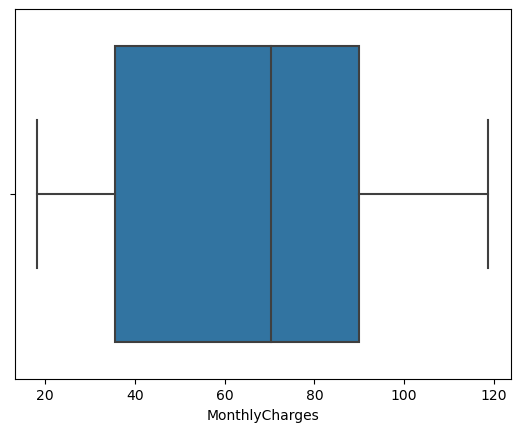

In [18]:
sns.boxplot(x=df1['MonthlyCharges'])
plt.show()

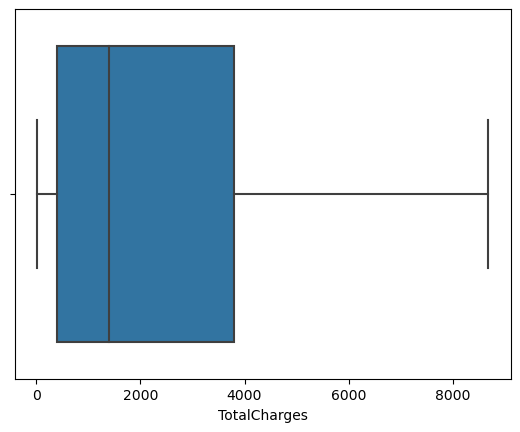

In [19]:
sns.boxplot(x=df1['TotalCharges'])
plt.show()

The data shows that none of our values are considered outliers so we do not need to deal with that in this data set. 

## 7. Data visualization


In [201]:
#Distribution of Numeric Values

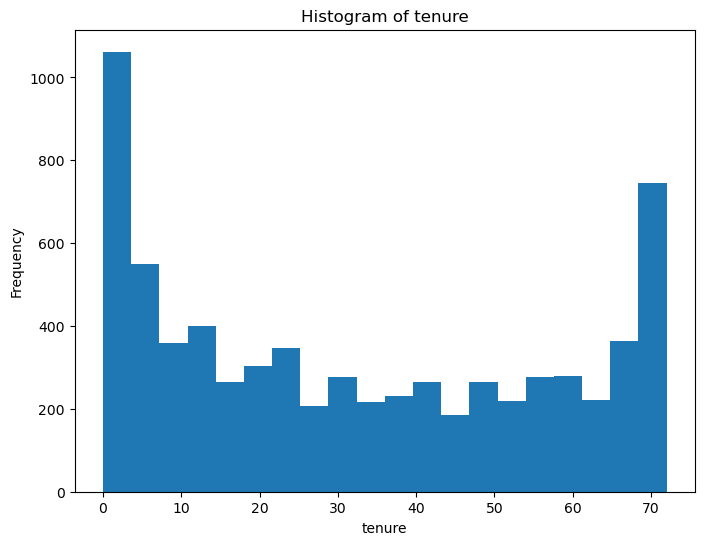

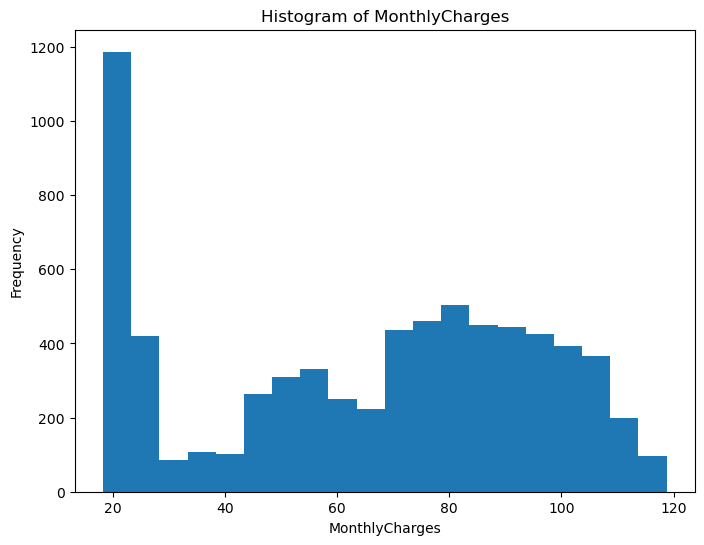

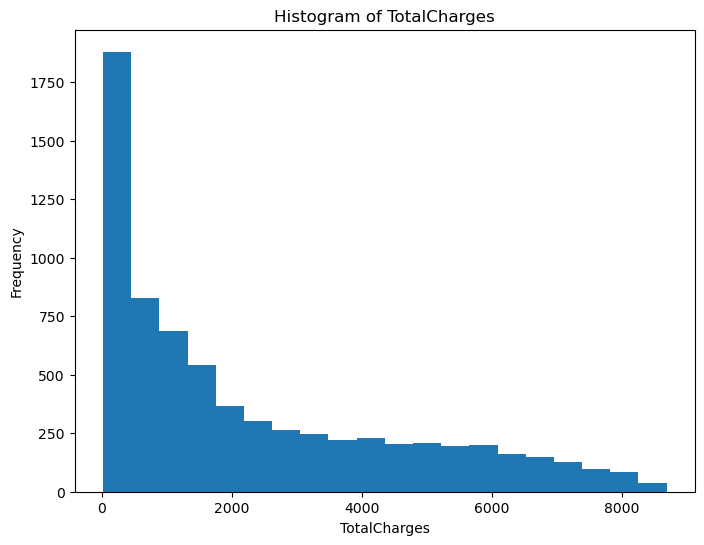

In [202]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])


num_bins = 20


for column in numeric_columns:
    plt.figure(figsize=(8, 6))  
    plt.hist(df[column], bins=num_bins)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Histogram of tenure: Most of the customers are either customers who  have been with the company less than 5 years
or customers who have had their account for more than 65 years.

Histogram of Monthly Charges: Most of the customers have less than $40 in monthly charges.

Histogram of Total Charges: The total charges chart indicates that most of the records have less than $2000 in total charges.
This may indicate that the customer base is overall low in tenure.

In [203]:
#Frequency of Categorical Variables

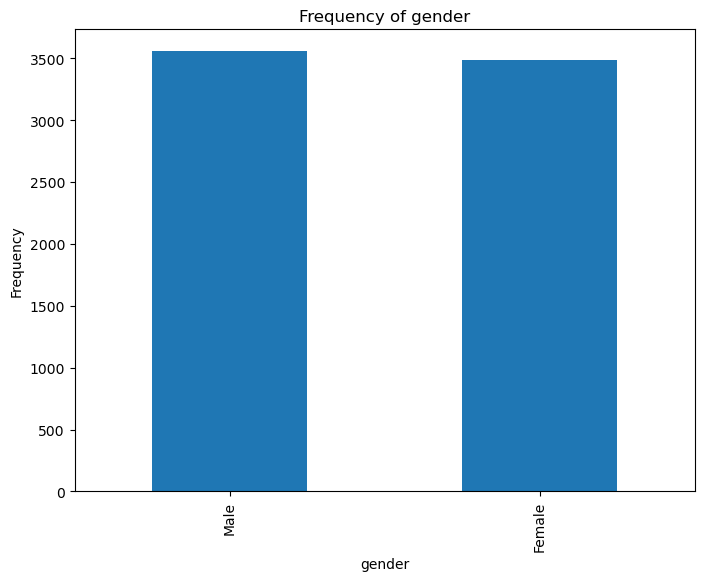

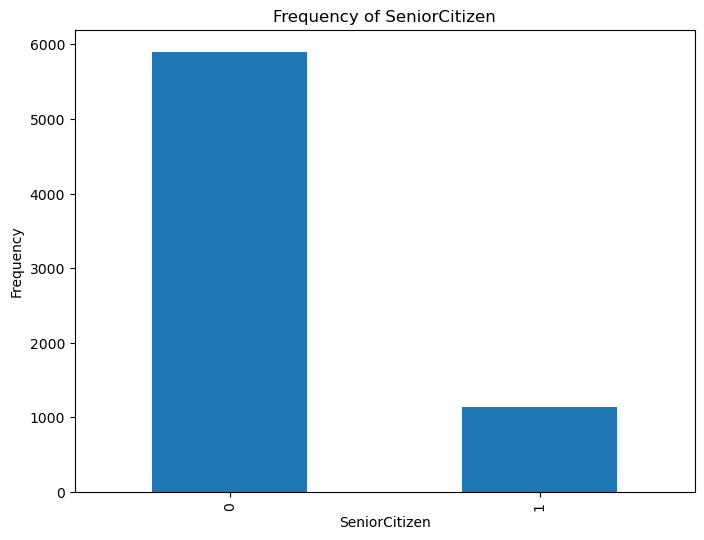

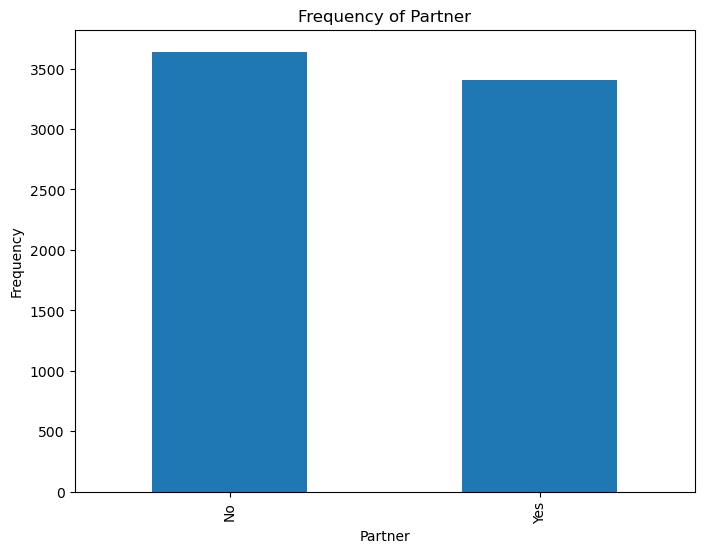

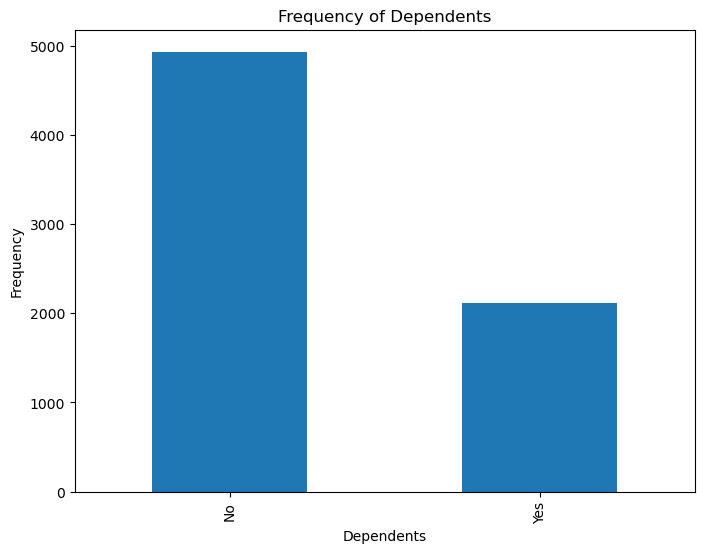

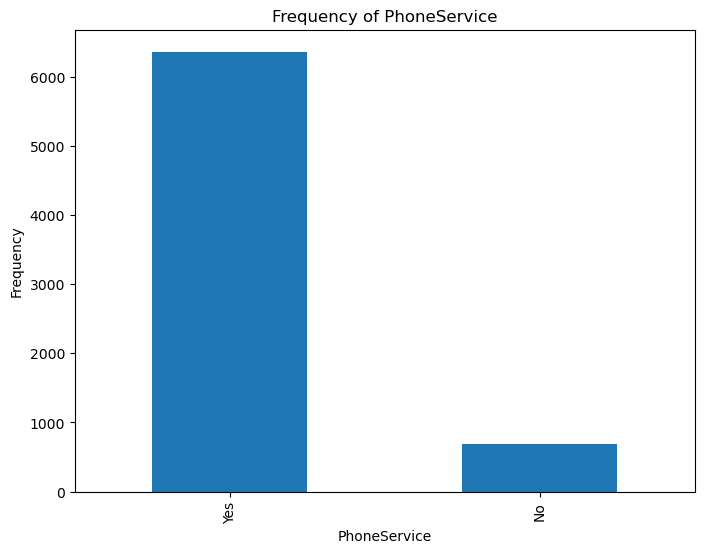

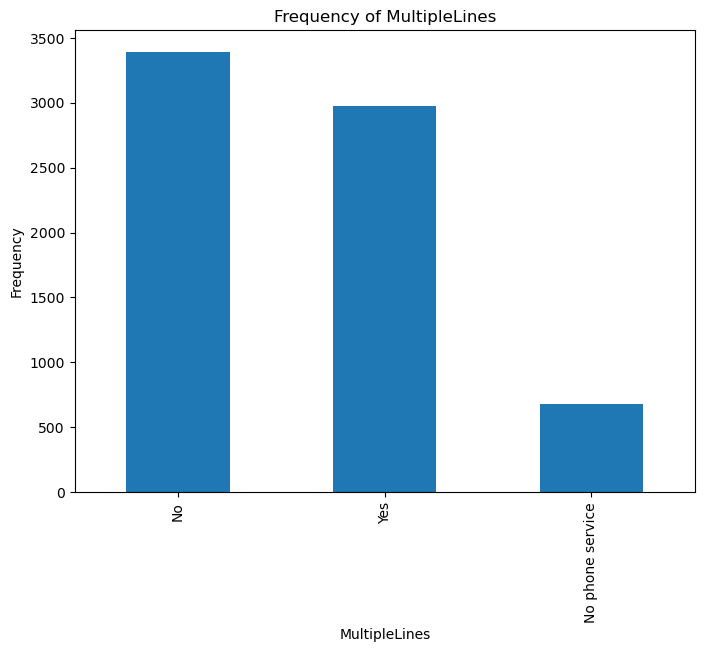

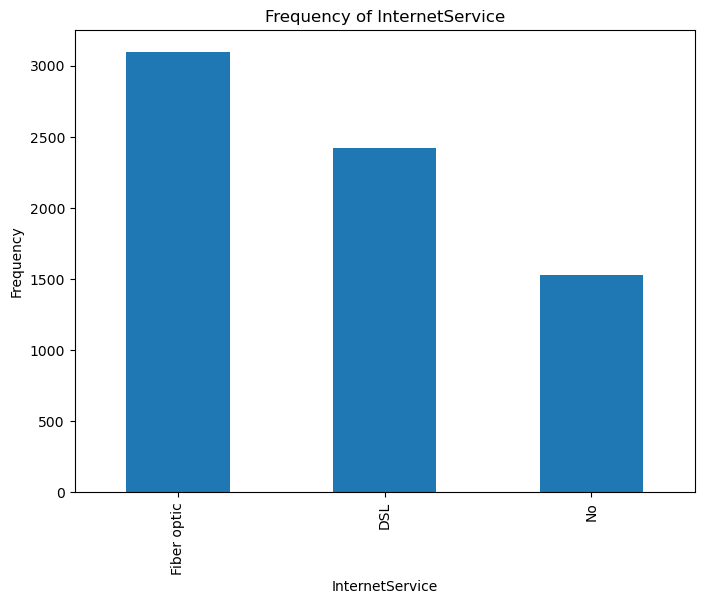

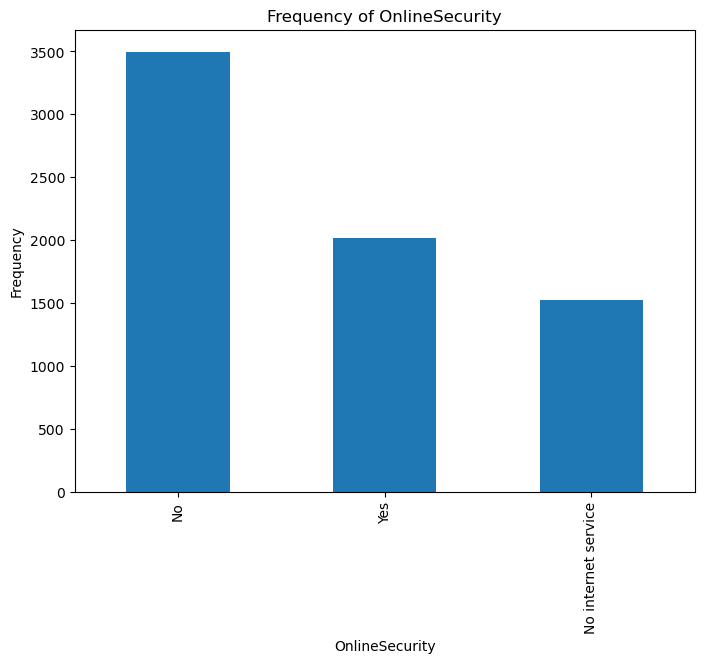

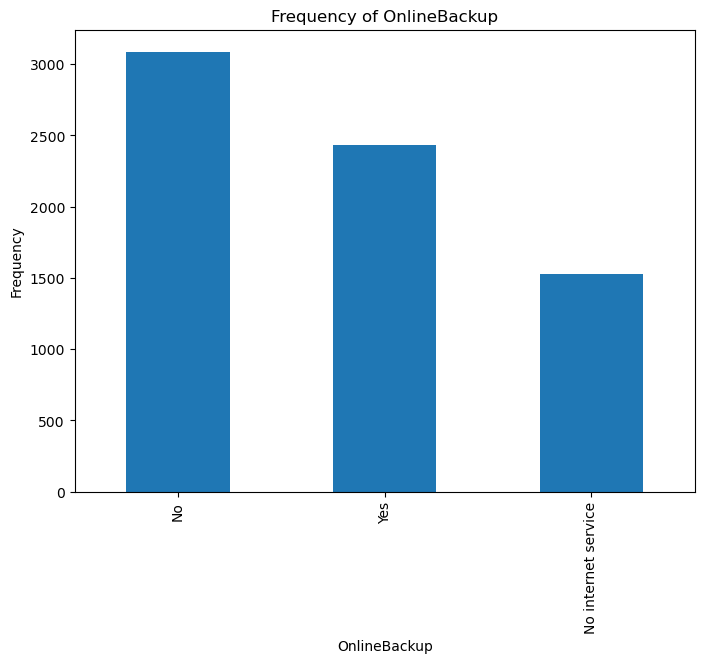

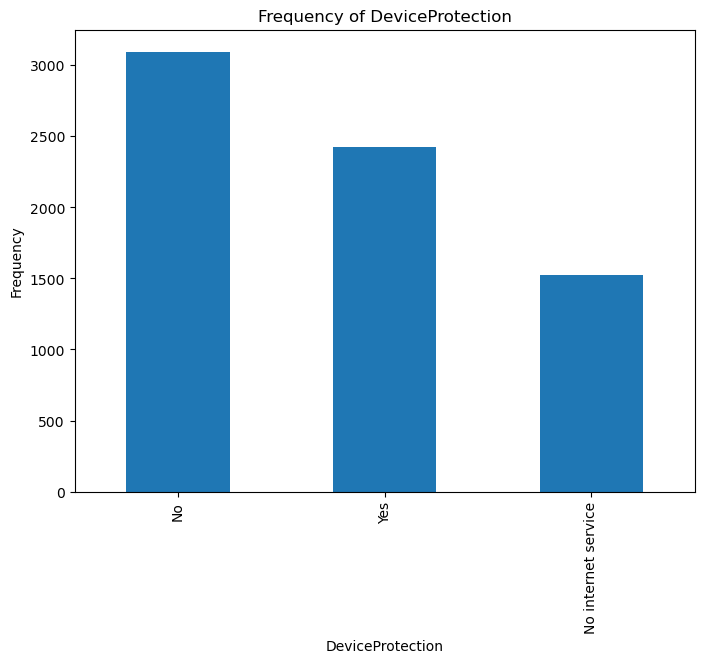

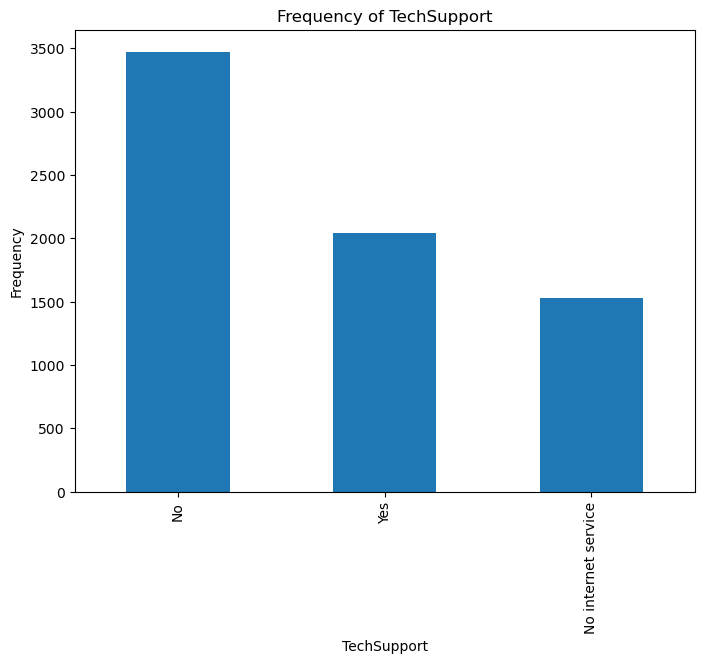

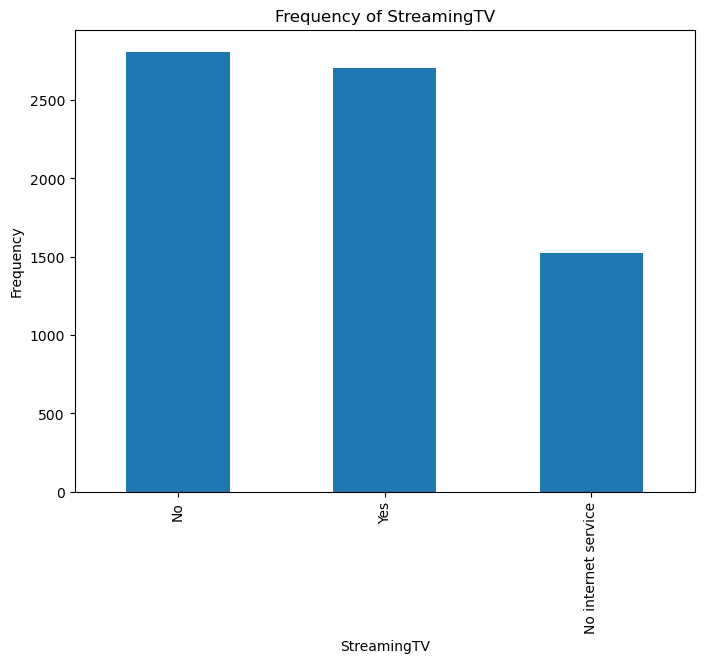

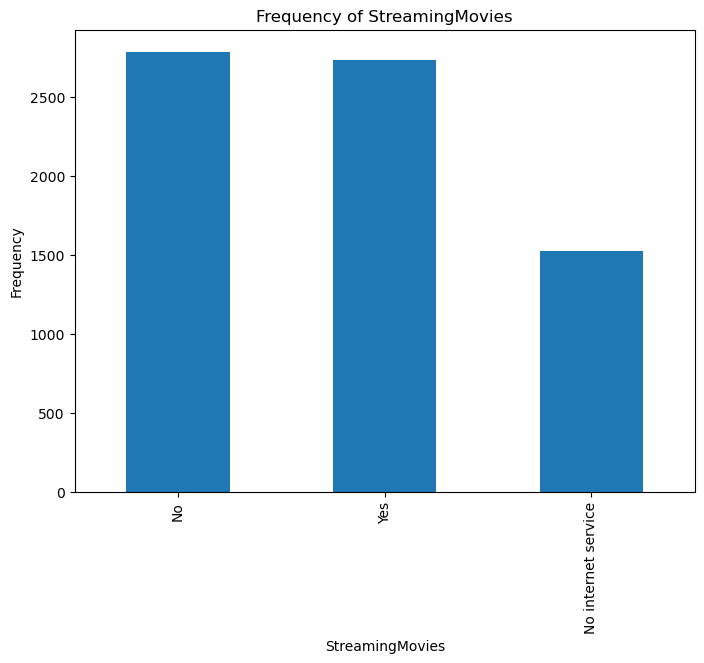

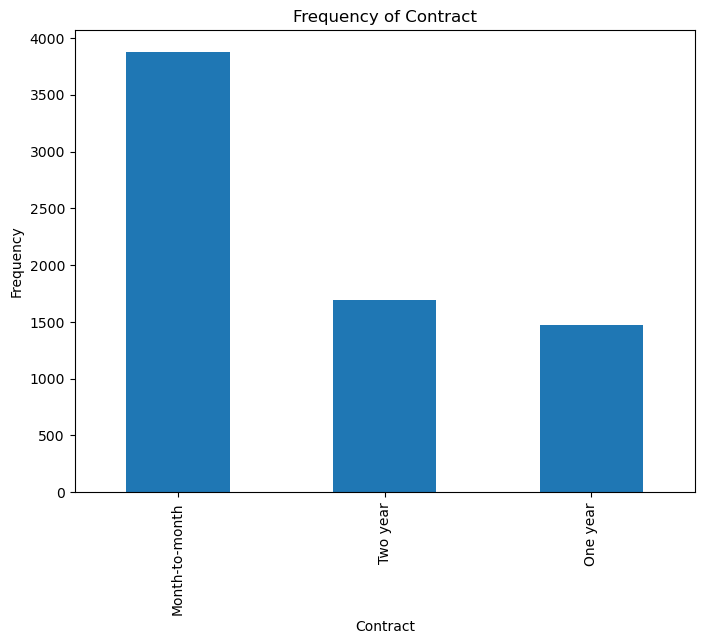

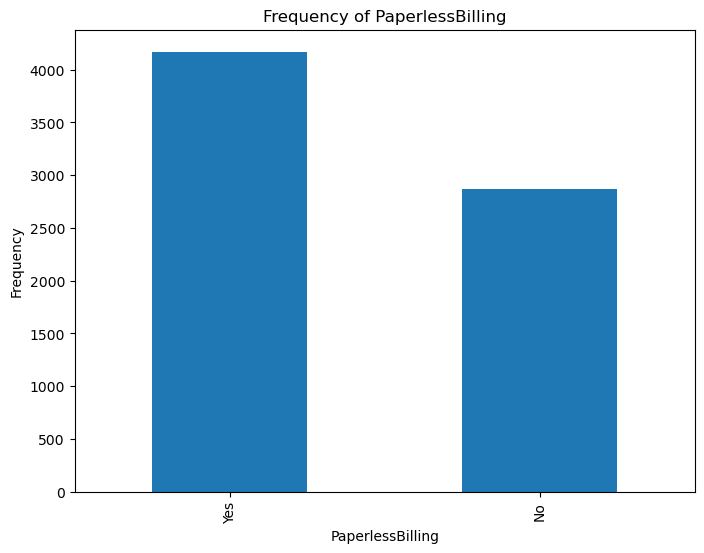

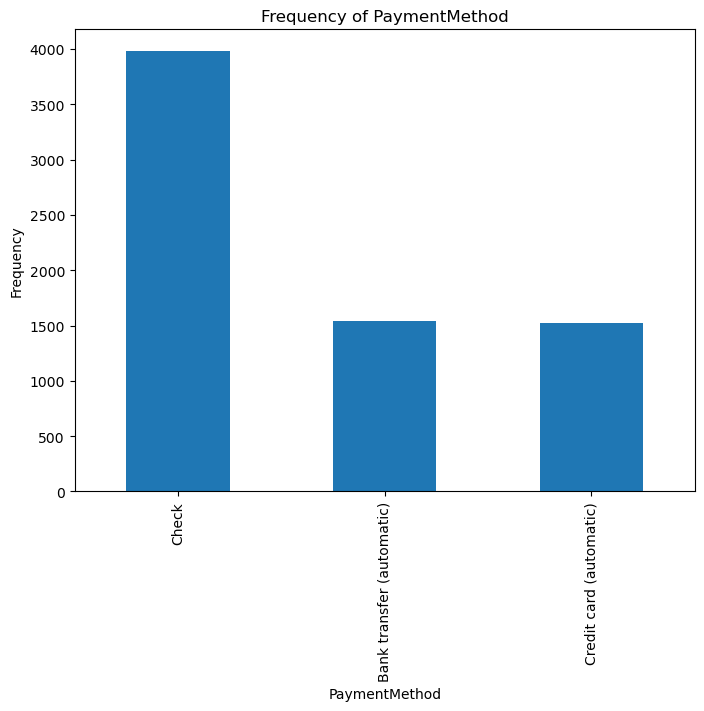

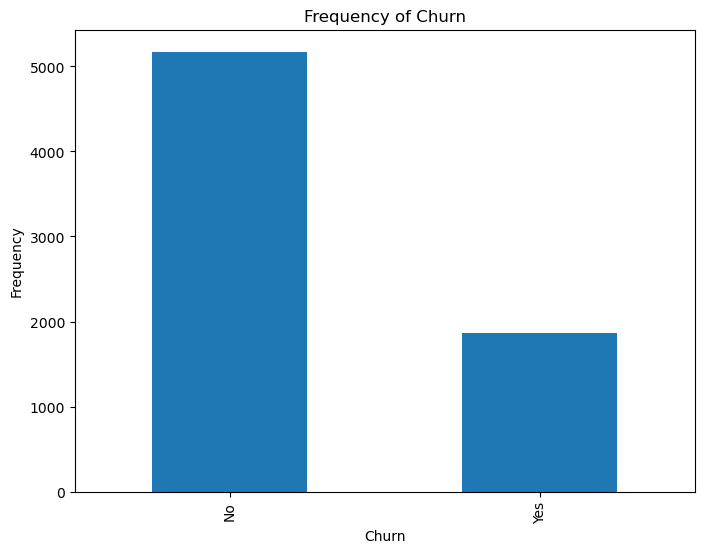

In [204]:
categorical_columns = df1.select_dtypes(include='category')


for column in categorical_columns:
    plt.figure(figsize=(8, 6))  
    column_counts = df[column].value_counts()
    column_counts.plot(kind='bar')
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- Frequency of Gender: There is no significant difference between the number of male vs female customers.
- Frequency of Senior Citizens: Most of the customers are not senior citizens.
- Frequency of Partner: There is no significant difference between customers who have partners and those who do not.
- Frequency of Dependents: Most of the customers do not have dependents.
- Frequency of Phone Service: Most of the customers use the phone service.
- Frequecny of Multiple Lines: There are more customers that use only one line compare to those who have multiple.
- Frequency of Internet Service: More of the users use fiber optic but a large number also use DSL.
- Frequency of Online Security: A large number of the customers do not subscribe to the online security service.
- Frequency of Online Backup: Less than half of internet subscribers also pay for online backup.
- Frequency of Device Protection: Most of the customers do not subscribe to device protection.
- Frequecy of Tech Support: Most of the customers do not subscribe to tech support as a part of their deal.
- Frequecny of Streaming TV: About half of the customers pay to stream TV.
- Frequency of Streaming Movies: About half of the customers pay to stream movies.
- Frequency of Contract: Most of the contracts are month to month.
- Frequency of Paperless Billing: Most of the customers are subscribed to paperless billing.
- Frequenct of Payment Method: Most customers pay using a form of check.

In [205]:
df.value_counts('Churn')

Churn
No     5174
Yes    1869
dtype: int64

Frequency of Churn: The frequency of churn indicates that most of the customer base ends up staying with the service at
at the tune of 73.46%.

In [206]:
#Aggregated Data

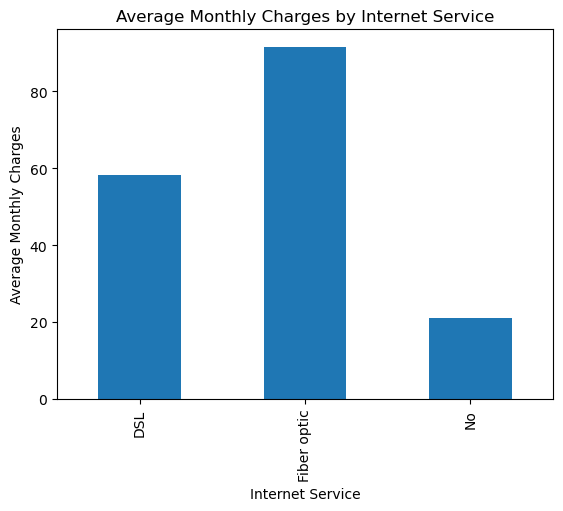

In [207]:
aggregated_data1 = df.groupby('InternetService')['MonthlyCharges'].mean()


aggregated_data1.plot(kind='bar')
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Internet Service')
plt.show()

This aggregated chart shows that customers are charged around 1.5 times more when using fiber optic compared to DSL.

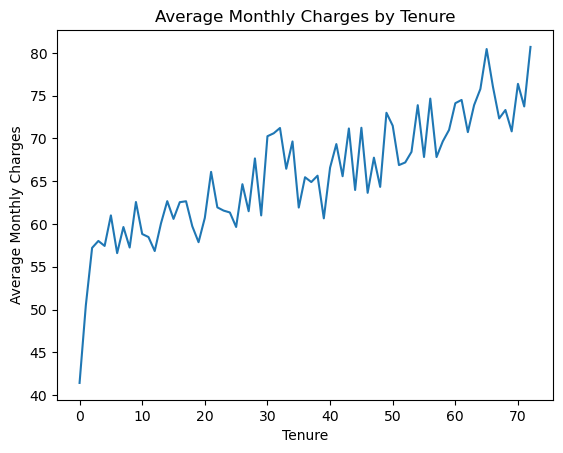

In [208]:
aggregated_data2 = df.groupby('tenure')['MonthlyCharges'].mean()


aggregated_data2.plot(kind='line')
plt.xlabel('Tenure')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Tenure')
plt.show()

The chart shows that customers who have a higher tenure tend to a higher montly charge.

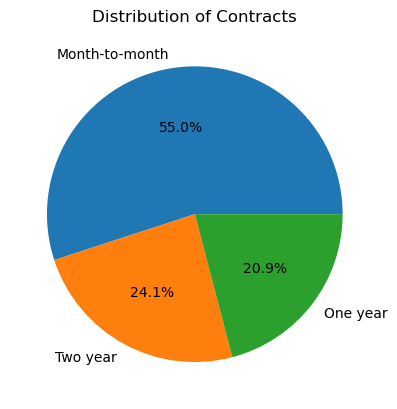

In [209]:
aggregated_data3 = df['Contract'].value_counts()


aggregated_data3.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Contracts')
plt.ylabel('')
plt.show()

This chart shows that most of the contracts are month-to-month.

## 8. Correlation analysis

In [24]:
correlation_matrix = df1.corr(numeric_only=True)
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


In [25]:
# Multicollinearity can be an issue when it comes with dealing with total charges and monthly charges.
# There is also a strong collinearity issue when it comes to tenure and Total Charges.

## 9. Data preprocessing


### 9.1. Dummies

In [26]:
df2 = pd.get_dummies(df1, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod','Churn'], drop_first=True)
df2
#We drop the first dummy because we have to try to avoid multicollinearity.


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Check,PaymentMethod_Credit card (automatic),Churn_Yes
11,72,117.80,8684.80,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
12,72,118.75,8672.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0
13,72,117.50,8670.10,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,0,1,0
14,72,116.95,8594.40,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
15,71,116.25,8564.75,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,19.00,19.00,0,0,1,1,1,0,0,...,1,0,1,0,0,0,1,1,0,0
7039,1,18.90,18.90,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
7040,1,18.85,18.85,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
7041,1,18.85,18.85,1,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,1


### 9.2. Normalization

In [27]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a copy of the dataframe
df_normalized = df2.copy()

# Apply Min-Max Scaling to the numeric columns
df_normalized[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

df_normalized.head(1)

# We need to normalize numeric columns because they have a different scale and will dominate the model if not adjuted.

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Check,PaymentMethod_Credit card (automatic),Churn_Yes
11,1.0,0.990547,1.0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


## 10. Modeling

**Naive Rule:** Following the naive rule means that the unseen data should be classified as no on churn because a majority (73.46%) of the customer base ends up staying with the service. 

In [28]:
predictors = predictor_columns = [col for col in df_normalized.columns if col != 'Churn_Yes']
outcome = 'Churn_Yes'

X=df_normalized[predictors]
y=df_normalized[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=26)


**Decision Tree Classifier**

In [29]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(5, 20)), 
    'min_samples_split': list(range(5, 30)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestTree = gridSearch.best_estimator_

Initial score:  0.7911894496290709
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}
Improved score:  0.7937915817676261
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.0011, 'min_samples_split': 5}


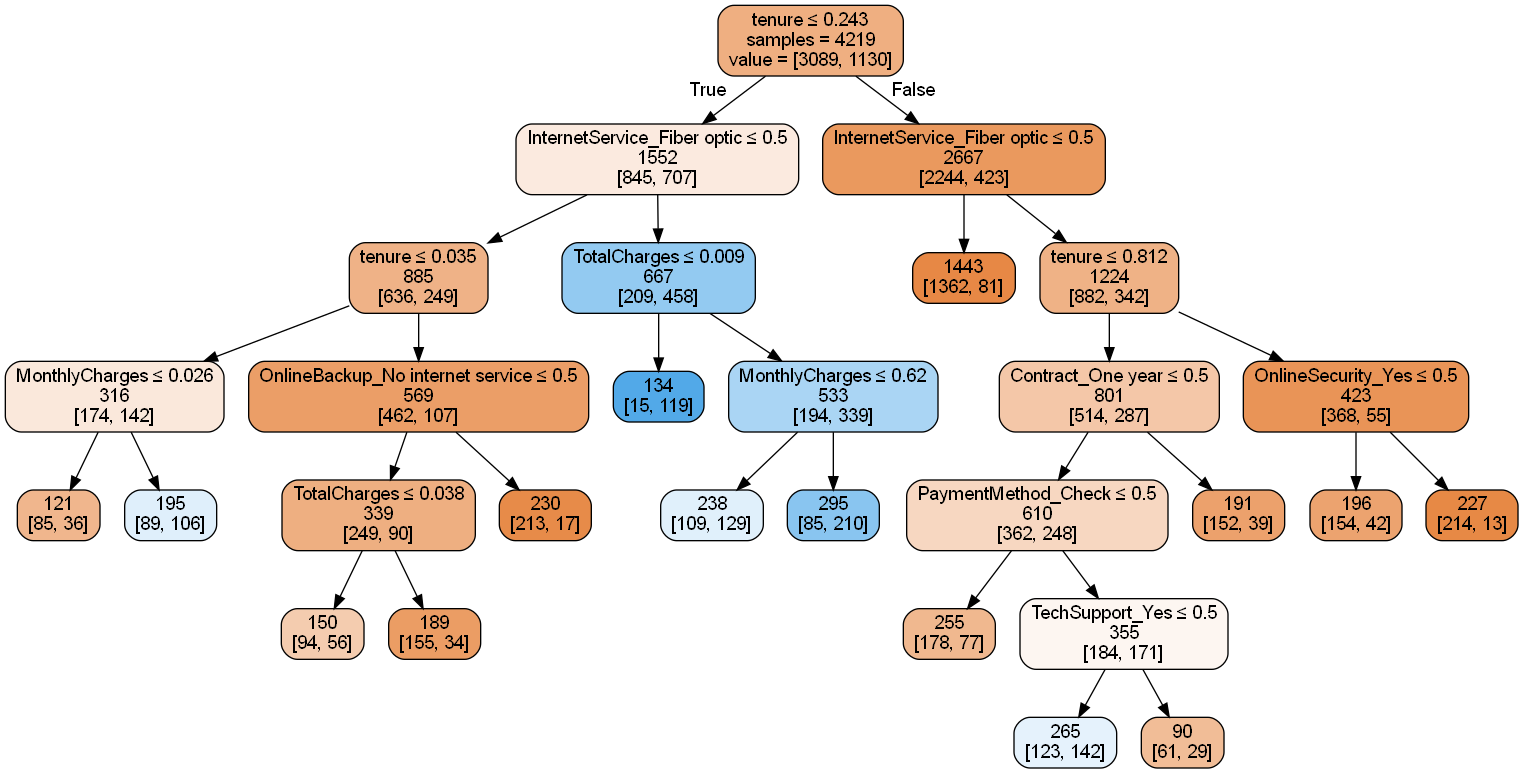

In [30]:
plotDecisionTree(bestTree, feature_names=train_X.columns)

**Logistic Regression**

In [31]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, 
                                                      random_state=1)

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=5)
logit_red.fit(train_X, train_y)

pd.set_option('display.width', 100)
print('regularization', logit_red.C_)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(valid_y, logit_red.predict(valid_X), df=len(train_X.columns) + 1))


# confusion matrix
classificationSummary(valid_y, logit_red.predict(valid_X),)

regularization [1291.54966501]
intercept  0.017136869276460978
         tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_1  Partner_Yes  \
coeff -3.934631       -1.531102      2.253672    -0.056046          0.15937      0.01363   

       Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  ...  \
coeff       -0.272783         -0.072385                        0.304168           0.248866  ...   

       TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
coeff        -0.372144                              0.0         0.296186   

       StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  \
coeff                             0.141501             0.489642           -0.61461   

       Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Check  \
coeff          -1.409122              0.444086               0.1075   

       PaymentMethod_Credit card (automatic)  
coeff                              -0

**Random Forest**

In [32]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                                  feature  importance       std
7                        PhoneService_Yes    0.004424  0.002572
20        StreamingTV_No internet service    0.004573  0.013068
8          MultipleLines_No phone service    0.004897  0.002941
11                     InternetService_No    0.004978  0.014158
22    StreamingMovies_No internet service    0.005268  0.014390
12     OnlineSecurity_No internet service    0.005531  0.014259
16   DeviceProtection_No internet service    0.005546  0.014557
18        TechSupport_No internet service    0.005613  0.014281
14       OnlineBackup_No internet service    0.006951  0.015961
28  PaymentMethod_Credit card (automatic)    0.014829  0.004595
21                        StreamingTV_Yes    0.016838  0.004268
23                    StreamingMovies_Yes    0.018743  0.004471
17                   DeviceProtection_Yes    0.019324  0.004899
6                          Dependents_Yes    0.019929  0.004574
9                       MultipleLines_Ye

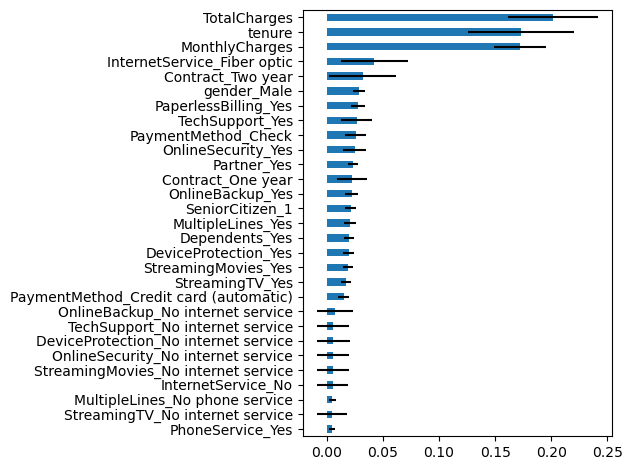

In [33]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [34]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.7952)

       Prediction
Actual    0    1
     0 1877  204
     1  372  360


**ROC Curve**

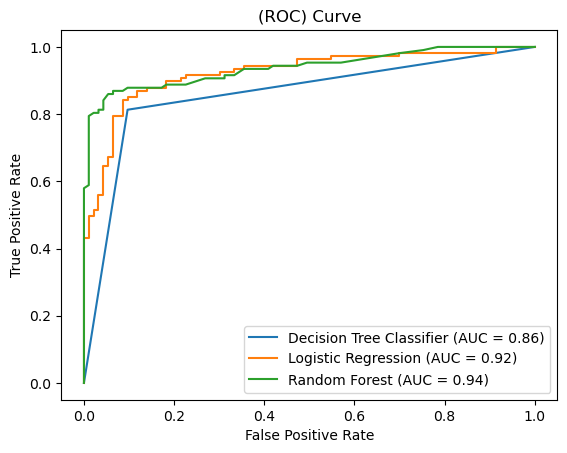

In [35]:
X, y = make_classification(n_samples=1000, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train the Logistic Regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Train the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
lr_probs = lr_classifier.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)

# Calculate the AUC (Area Under the Curve) for each model
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot the ROC curve for Decision Tree Classifier
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier (AUC = {:.2f})'.format(dt_auc))

# Plot the ROC curve for Logistic Regression
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))

#Plot the ROC curve for Random Forest Classifier
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()

# Show the plot
plt.show()

The best model for this data set is the random forest model as it has the highest area under the curve.